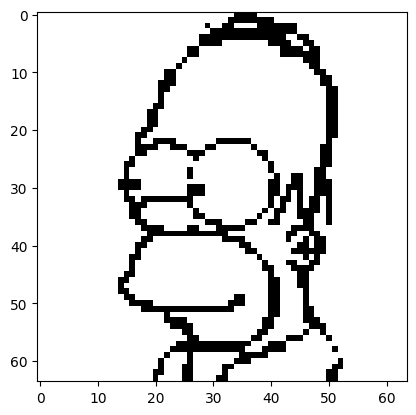

In [1]:
import numpy as np
import PIL.Image as Image
from matplotlib import pyplot as plt

homer = np.array(Image.open('data/homer_bw.png').resize((64, 64)))
homer = homer[:, :, 0]
homer = (homer > 128) * 2 - 1
homer = homer.reshape(-1)
plt.imshow(homer.reshape(64, 64), cmap='gray')

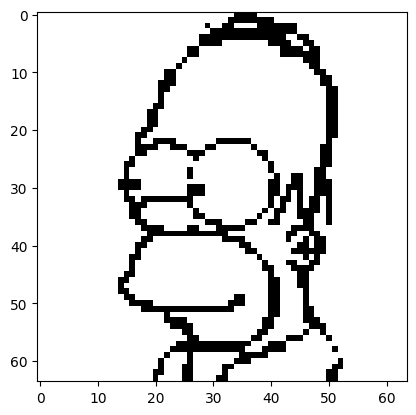

In [2]:
W = np.outer(homer, homer)
xi = np.random.choice([-1, 1], size=homer.shape)
for i in range(1):
    xi = np.sign(W @ xi)
plt.imshow(xi.reshape(64, 64) * xi[0], cmap='gray')

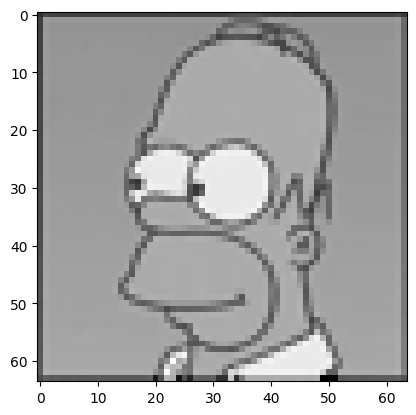

In [4]:
homer = np.array(Image.open('data/homer_original.png').resize((64, 64)))
homer = np.mean((homer / 255.) ** 2, axis=2) ** 0.5
homer = homer.reshape(-1)
plt.imshow(homer.reshape(64, 64), cmap='gray')

[0.69436501 0.70521392 0.7087017  ... 0.55328872 0.55396928 0.53810819]


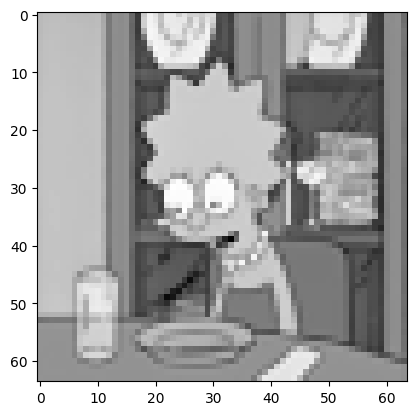

In [89]:
lisa = np.array(Image.open('data/lisa.png').resize((64, 64)))
lisa = np.mean((lisa / 255.) ** 2, axis=2) ** 0.5
lisa = lisa.reshape(-1)
plt.imshow(lisa.reshape(64, 64), cmap='gray')

[[-120.44505009]
 [ -45.60596359]]


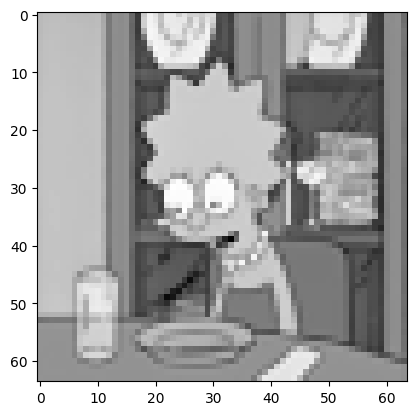

In [102]:
xi = np.random.normal(size=homer.shape)
#xi = lisa.copy()
xi[2048:] = 0
beta = 8.
pat = np.stack([homer, lisa])
for i in range(1):
    activation = beta * (pat @ np.expand_dims(xi, 1))
    print(activation)
    # normalizing activation doesn't affect softmax output, and prevents overflow
    activation = activation - np.max(activation, axis=0)
    exp_activation = np.exp(activation)
    xi = pat.T @ (exp_activation / exp_activation.sum(axis=0))
plt.imshow(xi.reshape(64, 64), cmap='gray')